In [29]:
import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

airbnb_data = pd.read_csv("cleaned_airbnb_Chicago.csv")

## Is the superhost status beneficial in any way ?

In [61]:
# T-Tests for revenue, customer satisfaction, and repeat bookings
# Revenue
t_stat_revenue, p_revenue = ttest_ind(airbnb_data[airbnb_data['host_is_superhost_in_period'] == 1]['revenue'],
                                      airbnb_data[airbnb_data['host_is_superhost_in_period'] == 0]['revenue'],
                                      nan_policy='omit')

# Customer Satisfaction (Average Rating)
t_stat_cs, p_cs = ttest_ind(airbnb_data[airbnb_data['host_is_superhost_in_period'] == 1]['rating_ave_pastYear'],
                            airbnb_data[airbnb_data['host_is_superhost_in_period'] == 0]['rating_ave_pastYear'],
                            nan_policy='omit')

# Repeat Bookings (Number of Reservations)
t_stat_rb, p_rb = ttest_ind(airbnb_data[airbnb_data['host_is_superhost_in_period'] == 1]['numReserv_pastYear'],
                            airbnb_data[airbnb_data['host_is_superhost_in_period'] == 0]['numReserv_pastYear'],
                            nan_policy='omit')

print(f"Revenue \nt-test :  {t_stat_revenue:.2f}, p : {p_revenue:.4f}\n")
print(f"Customer Satisfaction (average rating)\nt-test :  {t_stat_cs:.2f}, p : {p_cs:.4f}\n")
print(f"Repeat bookings \nt-test :  {t_stat_rb:.2f}, p: {p_rb:.4f}")

Revenue 
t-test :  12.39, p : 0.0000

Customer Satisfaction (average rating)
t-test :  127.10, p : 0.0000

Repeat bookings 
t-test :  -37.58, p: 0.0000


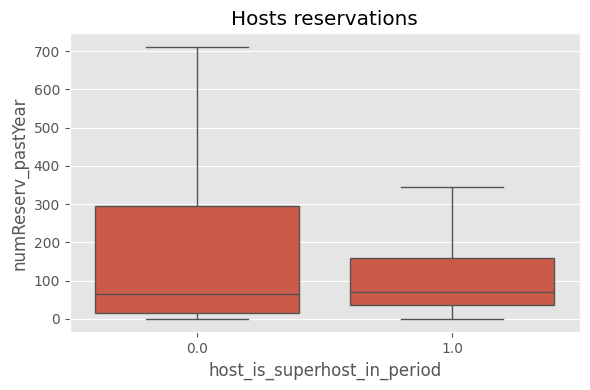

In [46]:
## Analysis to show the whether gaining superhost status was influenced by any classification metrics

# data = airbnb_data[airbnb_data['superhost_period_all'] isin []]
data = airbnb_data[airbnb_data['superhost_period_all'] isin [5,6,7,8]]



# sns.boxplot(x='host_is_superhost_in_period', y="numReserv_pastYear", data=airbnb_data)


# # Plotting
# plt.figure(figsize=(15, 10))
# plt.style.use('ggplot')
# plt.title(f'Hosts reservations')
# plt.tight_layout()
# plt.show()

# import seaborn as sns
# import matplotlib.pyplot as plt


# Create the box plot without outliers
plt.figure(figsize=(6, 4))
plt.style.use('ggplot')
plt.title(f'Hosts reservations')
sns.boxplot(x='host_is_superhost_in_period', y="numReserv_pastYear", data=airbnb_data, showfliers=False)
plt.tight_layout()
plt.show()


In [50]:
# Define the unique periods in your data
unique_periods = airbnb_data["superhost_period_all"].unique()
unique_periods

array([ 5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17.,
       18., 19., 20.])

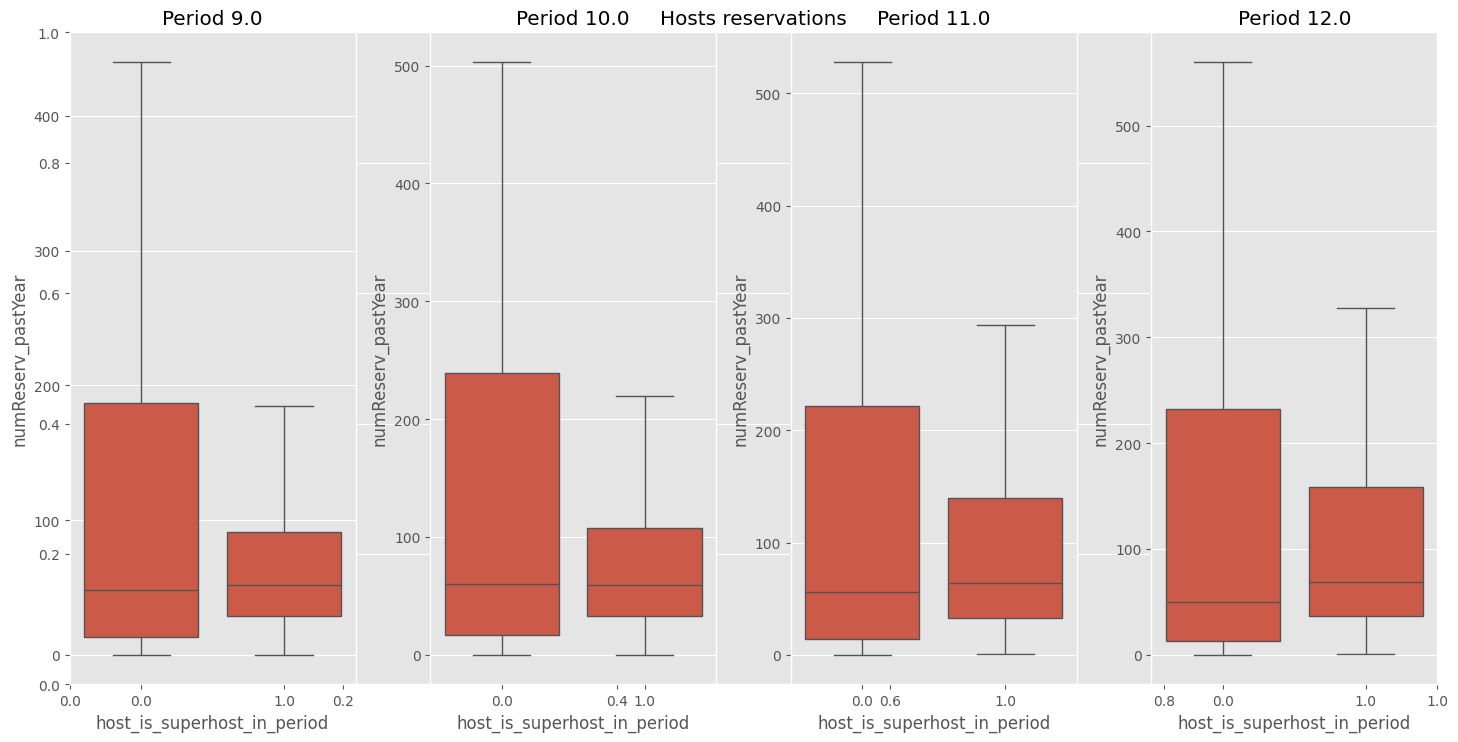

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the unique periods in your data
unique_periods = airbnb_data["superhost_period_all"].unique()
unique_periods = unique_periods[4:8]

# Create a single figure for all boxplots
plt.figure(figsize=(15, 8))
plt.style.use('ggplot')
plt.title(f'Hosts reservations')

# Loop through each period and create a boxplot
for i, period in enumerate(unique_periods):
    plt.subplot(1, len(unique_periods), i + 1)  # Create subplots for each period
    data = airbnb_data[airbnb_data['superhost_period_all'] == period]
    sns.boxplot(x='host_is_superhost_in_period', y="numReserv_pastYear", data=data, showfliers=False)
    plt.title(f'Period {period}')

plt.tight_layout()
plt.show()


## Does Airbnb's existing criteria accurately predict superhosts ?


### chi2 test

In [33]:
# Criteria for Superhost
min_trips = 10
min_response_rate = 90
max_cancellations = 0
min_5_star_prop = 80

# Convert 5-star reviews proportion to the 100 scale
airbnb_data['prop_5_StarReviews'] = airbnb_data['prop_5_StarReviews_pastYear'] * 100

criteria_met = ((airbnb_data['numReserv_pastYear'] >= min_trips) &
                (airbnb_data['hostResponseAverage_pastYear'] >= min_response_rate) &
                (airbnb_data['numCancel_pastYear'] <= max_cancellations) &
                (airbnb_data['prop_5_StarReviews'] >= min_5_star_prop)).astype(int)

# Creating a contingency table
contingency_table = pd.crosstab(airbnb_data['host_is_superhost_in_period'], criteria_met)

# Chi-Squared Test
chi2, p, dof, expected = chi2_contingency(contingency_table)


# Print statements with two decimal places
print(f"chi2 : {chi2:.2f}, p : {p:.2f}")
print(contingency_table)

chi2 : 43418.11, p : 0.00
col_0                            0      1
host_is_superhost_in_period              
0.0                          40850   8252
1.0                           2779  29363


chi2 : 43418.11, p : 0.00
col_0                            0      1
host_is_superhost_in_period              
0.0                          40850   8252
1.0                           2779  29363


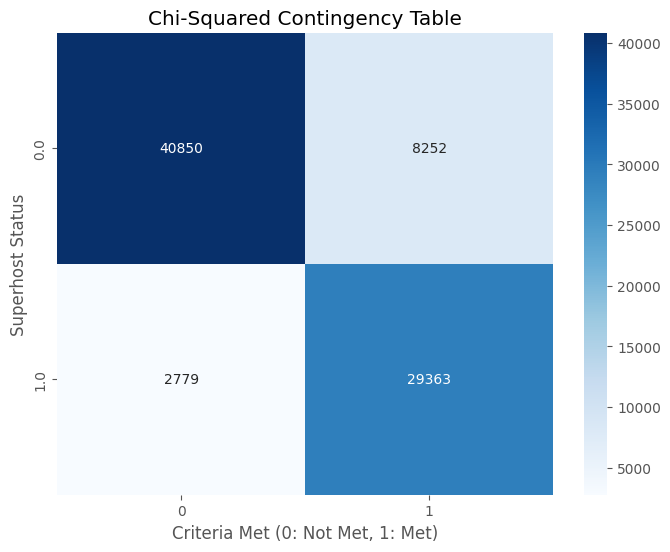

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Criteria for Superhost
min_trips = 10
min_response_rate = 90
max_cancellations = 0
min_5_star_prop = 80

# Convert 5-star reviews proportion to the 100 scale
airbnb_data['prop_5_StarReviews'] = airbnb_data['prop_5_StarReviews_pastYear'] * 100

criteria_met = ((airbnb_data['numReserv_pastYear'] >= min_trips) &
                (airbnb_data['hostResponseAverage_pastYear'] >= min_response_rate) &
                (airbnb_data['numCancel_pastYear'] <= max_cancellations) &
                (airbnb_data['prop_5_StarReviews'] >= min_5_star_prop)).astype(int)

# Creating a contingency table
contingency_table = pd.crosstab(airbnb_data['host_is_superhost_in_period'], criteria_met)

# Chi-Squared Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print statements with two decimal places
print(f"chi2 : {chi2:.2f}, p : {p:.2f}")
print(contingency_table)

# Visualize the contingency table as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues")
plt.title("Chi-Squared Contingency Table")
plt.xlabel("Criteria Met (0: Not Met, 1: Met)")
plt.ylabel("Superhost Status")
plt.show()


In [34]:
# Criteria for Superhost
min_trips = 10
min_response_rate = 90
max_cancellations = 0
min_5_star_prop = 80

# Convert response rate and 5-star reviews proportion to comparable scales
# airbnb_data['hostResponseRate'] = airbnb_data['hostResponseAverage_pastYear'] 
airbnb_data['prop_5_StarReviews'] = airbnb_data['prop_5_StarReviews_pastYear'] * 100

# Identifying Superhosts who don't meet criteria
superhosts_not_meeting_criteria = airbnb_data[
    (airbnb_data['host_is_superhost_in_period'] == 1) &
    (
        (airbnb_data['numReserv_pastYear'] < min_trips) |
        (airbnb_data['hostResponseAverage_pastYear'] < min_response_rate) |
        (airbnb_data['numCancel_pastYear'] > max_cancellations) |
        (airbnb_data['prop_5_StarReviews'] < min_5_star_prop)
    )
]

# Identifying Non-Superhosts meeting criteria
non_superhosts_meeting_criteria = airbnb_data[
    (airbnb_data['host_is_superhost_in_period'] == 0) &
    (airbnb_data['numReserv_pastYear'] >= min_trips) &
    (airbnb_data['hostResponseAverage_pastYear'] >= min_response_rate) &
    (airbnb_data['numCancel_pastYear'] <= max_cancellations) &
    (airbnb_data['prop_5_StarReviews'] >= min_5_star_prop)
]

# Count of superhosts not meeting criteria and non-superhosts meeting criteria
count_superhosts_not_meeting = superhosts_not_meeting_criteria.shape[0]
count_non_superhosts_meeting = non_superhosts_meeting_criteria.shape[0]

# count_superhosts_not_meeting, count_non_superhosts_meeting
print(f"superhosts not meeting the criteria : {count_superhosts_not_meeting} \n non_superhosts meeting the criteria : {count_non_superhosts_meeting}")


superhosts not meeting the criteria : 2779 
 non_superhosts meeting the criteria : 8252


### Correlation analysis

- cancellations | ratings -> -0.19
- prop_5_StarReviews | rating -> 0.93
- reservations | ratings -> -0.14
- reservations | 5star_reviews -> -0.18
- reservations | cancellations -> 0.37
- revenue | booking rate -> 0.27

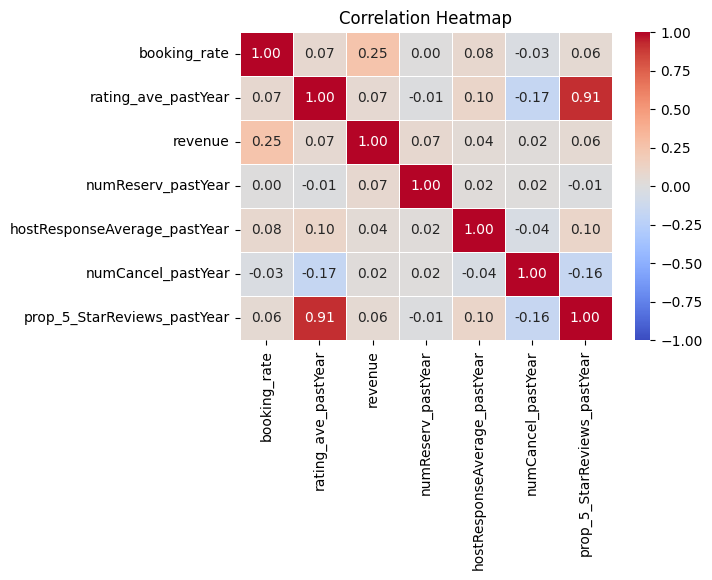

In [35]:
# Creating Business Metrics
airbnb_data['booking_rate'] = (airbnb_data['booked_days'] / airbnb_data['available_days']) * 100

# Correlation Analysis
correlation_matrix = airbnb_data[['booking_rate', 'rating_ave_pastYear', 'revenue', 'numReserv_pastYear', 
                                           'hostResponseAverage_pastYear', 'numCancel_pastYear', 'prop_5_StarReviews_pastYear']].corr()

correlation_matrix

# Create a heatmap with correlation values
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.xticks(rotation=90)
plt.show()


### Logreg model performance

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

def get_classification_results(model, y, X):

    predictions = model.predict(X)

    # Convert probabilities to binary predictions (e.g., 0 or 1) based on a threshold (e.g., 0.5)
    # You can choose an appropriate threshold based on your problem
    threshold = 0.5
    binary_predictions = (predictions > threshold).astype(int)

    conf_matrix = confusion_matrix(y, binary_predictions)
    clf_report = classification_report(y, binary_predictions)

    return conf_matrix, clf_report

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import statsmodels.api as sm


airbnb_data.dropna(subset=["hostResponseAverage_pastYear"], inplace=True)

# Prepare data for logistic regression
X = airbnb_data[['numReserv_pastYear', 'hostResponseAverage_pastYear', 'numCancel_pastYear', 'prop_5_StarReviews']]
y = airbnb_data['host_is_superhost_in_period']

# Adding a constant to the model for the intercept
X = sm.add_constant(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Logistic Regression Model
log_reg = sm.Logit(y_train, X_train).fit()

# Model Summary
model_summary = log_reg.summary()
print(model_summary)

Optimization terminated successfully.
         Current function value: 0.485812
         Iterations 8
                                Logit Regression Results                               
Dep. Variable:     host_is_superhost_in_period   No. Observations:                56870
Model:                                   Logit   Df Residuals:                    56865
Method:                                    MLE   Df Model:                            4
Date:                         Fri, 08 Dec 2023   Pseudo R-squ.:                  0.2757
Time:                                 13:46:14   Log-Likelihood:                -27628.
converged:                                True   LL-Null:                       -38144.
Covariance Type:                     nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------


In [41]:
conf_matrix, clf_report = get_classification_results(log_reg, y_test, X_test)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", clf_report)


Confusion Matrix:
 [[12013  2655]
 [ 2740  6966]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.82      0.82     14668
         1.0       0.72      0.72      0.72      9706

    accuracy                           0.78     24374
   macro avg       0.77      0.77      0.77     24374
weighted avg       0.78      0.78      0.78     24374



Building a new model

In [37]:
selected_variables = ['numReserv_pastYear', 'hostResponseAverage_pastYear', 'numCancel_pastYear', 'prop_5_StarReviews',  "Pets Allowed", "Bedrooms", "Bathrooms", "Max Guests", "Instantbook Enabled", "Cleaning Fee (USD)", "Nightly Rate", "available_days", "booking_rate", "Number of Photos", "Number of Reviews"]

# Create a new DataFrame with only the selected variables
new_X = airbnb_data[selected_variables]

# For categorical features like Property Type, Listing Type, etc., use one-hot encoding
# categorical_columns = ['Property Type', 'Listing Type']
categorical_columns = ['Listing Type']

# Create dummy variables for the categorical columns and concatenate them with X
for column in categorical_columns:
    dummies = pd.get_dummies(airbnb_data[column], prefix=column, drop_first=True)
    new_X = pd.concat([new_X, dummies], axis=1)

bool_columns = new_X.select_dtypes(include=['bool']).columns
new_X[bool_columns] = new_X[bool_columns].astype(int)

# Add a constant term (intercept) to the independent variables
new_X = sm.add_constant(new_X)

new_y = airbnb_data['host_is_superhost_in_period']


# Splitting the data into training and testing sets
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.3, random_state=42)

# Logistic Regression Model
new_log_reg = sm.Logit(new_y_train, new_X_train).fit()

# Model Summary
new_model_summary = new_log_reg.summary()
print(new_model_summary)

Optimization terminated successfully.
         Current function value: 0.450954
         Iterations 8
                                Logit Regression Results                               
Dep. Variable:     host_is_superhost_in_period   No. Observations:                56870
Model:                                   Logit   Df Residuals:                    56851
Method:                                    MLE   Df Model:                           18
Date:                         Fri, 08 Dec 2023   Pseudo R-squ.:                  0.3277
Time:                                 13:53:28   Log-Likelihood:                -25646.
converged:                                True   LL-Null:                       -38144.
Covariance Type:                     nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------


In [40]:
conf_matrix, clf_report = get_classification_results(new_log_reg, new_y_test, new_X_test)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", clf_report)


Confusion Matrix:
 [[12117  2551]
 [ 2684  7022]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.83      0.82     14668
         1.0       0.73      0.72      0.73      9706

    accuracy                           0.79     24374
   macro avg       0.78      0.77      0.78     24374
weighted avg       0.78      0.79      0.78     24374



## LinAlgError: Singular matrix
When there is perfect correlation between any to variables in our data, we get the above error.
We found perfectly correlated variable Pairs :
Property Type_Room in bed and breakfast and Listing Type_Hotel room

**Hence "Property Type_Room in bed and breakfast" needs to be dropped.**

Update: Even after removing this particular field, the error persists, and according to an answer on quora, "When you have a categorical variable with too many levels, the levels start to become linearly dependent on each other, which again causes the matrix to be singular." 

**Hence Property_Type cannot be used in logistic model.**

In [129]:
# Check for correlation between independent variables
correlation_matrix = new_X_train.corr()

# Create a mask for highly correlated variables
# mask = (correlation_matrix >= -1) & (correlation_matrix <= -0.9)
mask = (correlation_matrix == 1) | (correlation_matrix == -1)

# Find pairs of highly correlated variables
highly_correlated_vars = [(i, j) for i in range(correlation_matrix.shape[0]) for j in range(i+1, correlation_matrix.shape[0]) if mask.iloc[i, j]]

# Print highly correlated variable pairs
print("Perfectly Correlated Variable Pairs:")
for var_pair in highly_correlated_vars:
    print(f"{X_train.columns[var_pair[0]]} and {X_train.columns[var_pair[1]]}")

Perfectly Correlated Variable Pairs:


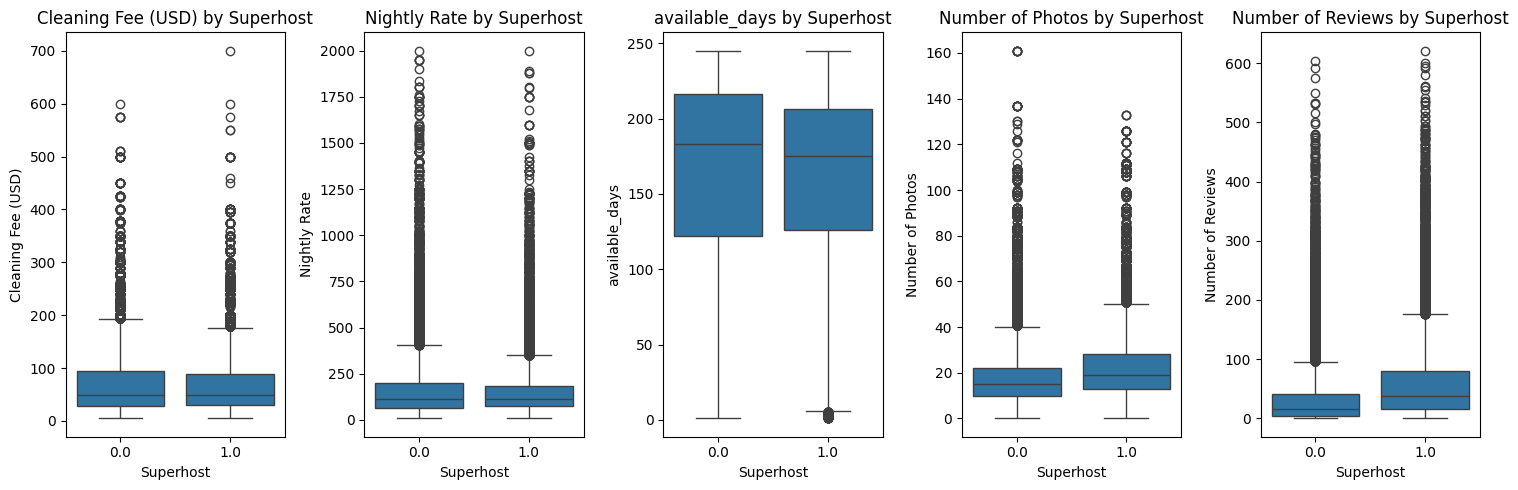

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the variables of interest
variables = ['Cleaning Fee (USD)', 'Nightly Rate', 'available_days', 'Number of Photos', 'Number of Reviews']

# Create a single figure with multiple subplots
fig, axes = plt.subplots(1, len(variables), figsize=(15, 5))

# Create box plots for each variable based on the "superhost" category and place them in subplots
for i, variable in enumerate(variables):
    sns.boxplot(x='host_is_superhost_in_period', y=variable, data=airbnb_data, ax=axes[i])
    axes[i].set_title(f'{variable} by Superhost')
    axes[i].set_xlabel('Superhost')
    axes[i].set_ylabel(variable)

# Adjust spacing between subplots
plt.tight_layout()

# Save the figure as a single image
plt.savefig('box_plots.png')

# Show the figure (optional)
plt.show()
